In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# that our own data from the students only added genders
data = {
    'Name': ['khushi', 'lokesh', 'lalit', 'kunal', 'ishika'],
    'Math': [85, 72, 91, 68, 77],
    'Science': [90, 78, 88, 72, 84],
    'English': [82, 85, 79, 70, 88],
    'Gender': ['F', 'M', 'M', 'M', 'F'],
    'Grade': ['A', 'B', 'A', 'C', 'B']
}
df=pd.DataFrame(data)

In [19]:
df

,Name,Math,Science,English,Gender,Grade
0,khushi,85,90,82,F,A
1,lokesh,72,78,85,M,B
2,lalit,91,88,79,M,A
3,kunal,68,72,70,M,C
4,ishika,77,84,88,F,B


# 1.create new columns from existing ones (feature creation):


In [22]:
df['Total'] = df[['Math', 'Science', 'English']].sum(axis=1, min_count=2)  # At least 2 subjects present
df['Average'] = df['Total'] / 3
print("\nAfter Adding Total & Average:")
print(df[['Name', 'Total', 'Average']])


After Adding Total & Average:
     Name  Total    Average
0  khushi    257  85.666667
1  lokesh    235  78.333333
2   lalit    258  86.000000
3   kunal    210  70.000000
4  ishika    249  83.000000


# 2.Encode categorical data (covert text to numbers):

In [25]:
df["Gender_code"]=df["Gender"].map({"M":1,"F":0})
#le = label encoder 
le = LabelEncoder()
df["Grade_code"] = le.fit_transform(df["Grade"].fillna("Unknown"))

print("\n After Encoding:")
print(df[["Name","Gender","Gender_code","Grade","Grade_code"]])



 After Encoding:
     Name Gender  Gender_code Grade  Grade_code
0  khushi      F            0     A           0
1  lokesh      M            1     B           1
2   lalit      M            1     A           0
3   kunal      M            1     C           2
4  ishika      F            0     B           1


# 3.Handle missing values:

In [28]:
df['Math'].fillna(df['Math'].mean(), inplace=True)
df['Science'].fillna(df['Science'].mean(), inplace=True)
df['English'].fillna(df['English'].mean(), inplace=True)

# Drop rows with missing grades (optional)
df.dropna(subset=['Grade'], inplace=True)

print("\nAfter Handling Missing Values:")
print(df)


After Handling Missing Values:
     Name  Math  Science  English Gender Grade  Total    Average  Gender_code  \
0  khushi    85       90       82      F     A    257  85.666667            0   
1  lokesh    72       78       85      M     B    235  78.333333            1   
2   lalit    91       88       79      M     A    258  86.000000            1   
3   kunal    68       72       70      M     C    210  70.000000            1   
4  ishika    77       84       88      F     B    249  83.000000            0   

   Grade_code  
0           0  
1           1  
2           0  
3           2  
4           1  


C:\Users\DELL\AppData\Local\Temp\ipykernel_23556\2251686979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math'].fillna(df['Math'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23556\2251686979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# 4.Correlation Matrix (find the hidden relationship):

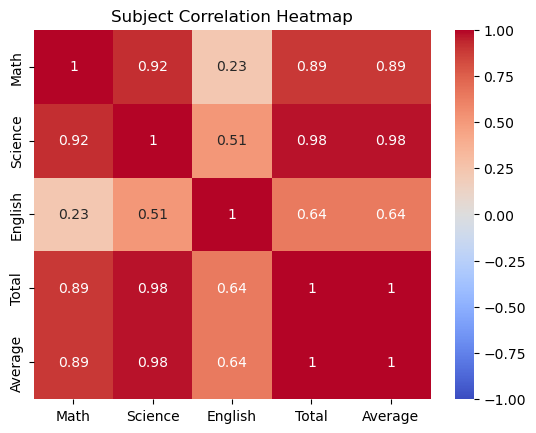

In [31]:
corr = df[['Math', 'Science', 'English', 'Total', 'Average']].corr()

# Visualize
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Subject Correlation Heatmap")
plt.show()

# 5.normalization (use minmax_scaler and standard_scaler):


In [34]:
scaler = MinMaxScaler()
df[['Math_Scaled']] = scaler.fit_transform(df[['Math']])

print("\nAfter MinMax Scaling:")
print(df[['Name', 'Math', 'Math_Scaled']])


After MinMax Scaling:
     Name  Math  Math_Scaled
0  khushi    85     0.739130
1  lokesh    72     0.173913
2   lalit    91     1.000000
3   kunal    68     0.000000
4  ishika    77     0.391304


In [44]:
scaler = StandardScaler()

# Scale numerical columns
numeric_cols = ['Math', 'Science', 'English']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n After Standard Scaling: ")
print(df[['Name', 'Math', 'Science', 'English']])


 After Standard Scaling: 
     Name      Math   Science   English
0  khushi  0.761473  1.147832  0.194257
1  lokesh -0.785269 -0.664534  0.679900
2   lalit  1.475354  0.845771 -0.291386
3   kunal -1.261190 -1.570717 -1.748315
4  ishika -0.190368  0.241649  1.165543


# Feature Engineering steps:
# feature engineering is basically created new useful information from your raw data and used for  better undestanding data and also pattern to easily understand 
# 1.feature creation (created new columns from existing ones)
# 2.encoding categorical data ( conver text to number because this is the ML algorithm and that only understand the nummrical language.
# 3.Handle missing values(filling or removing empty data spots and also used for accuracy,prevent errors,system errors)
# 4.correlation matrix ( find the hidden reveal relationship create the matrix of that )
# 5.Normalization (it is used for scaling the number from range 0 to 1 that are convert ex : marks to percentage.
# 1.min_max_scaler : it is used for small data and also used for images data that range are from 0 to 1.
# 2.standard_scaler: it is used for large and complex nummerical data that are used for big dataset and range from _infinity to +infinity .
# usage of pandas,seaborn,matploblib,sklearn :
# 1.pandas is the data organizer that helps to clean organize and analyze tabular data : read and write data files (csvfile) handle missing values (fillna , dropna) and many more etc.
# 2.seaborn is the data artist that are used for data visualization and makes beatiful colour graph minimal code create plots and maps and charts.
# 3.Matplotlib is the graph artist that are used to create simple graph create basic plots plt.plot, plt.bar and save figure.
# 4.sklearn is the Machine learning toolkit that are train and build models that are used for preprocesses data (standardscaler,min_maxscaler,LabelEncoder , tains models and accuracy .